In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
huggingface_dataset = load_dataset("swaption2009/20k-en-zh-translation-pinyin-hsk",data_dir="")
huggingface_dataset = huggingface_dataset["train"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import pandas as pd

In [ ]:
num_of_rows = huggingface_dataset.num_rows//5
huggingface_raw_data = pd.DataFrame(columns=["english","chinese"])
huggingface_datalist = []
print(num_of_rows)
for i in range(num_of_rows):
    english = huggingface_dataset[(i*5)+0]["text"].strip("english: ")
    chinese = huggingface_dataset[(i*5)+2]["text"].strip("mandarin: ")
#     print(english)
#     print(chinese)
#     print("="*10)
    df_row = pd.DataFrame([[english,chinese]], columns=["english", "chinese"])
    huggingface_raw_data = pd.concat([huggingface_raw_data, df_row], ignore_index=True)
display(huggingface_raw_data)

22364


,english,chinese
0,She wears a shawl with a mink,她戴着带有貂皮的披肩
1,"`Abracadabra,' said the conjuror as he pulled ...","魔术师口中念念有词, 把兔子从礼帽中掏了出来."
2,20 jin goes to 10 kilograms.,二十市斤折合十公斤。
3,A balcony is a platform with a wall.,阳台是有墙的平台。
4,A belt of trees grew between the two fields.,两块田之间有一条树木带。
...,...,...
22359,"The capital of Wisconsin, in the south-central...",麦迪逊美国威斯康星州首府，位于该州的中南部，密尔沃基的西边。它于1836年被选定作为该州的首...
22360,"The capital of Wisconsin, in the south-central...",麦迪逊美国威斯康星州首府，位于该州的中南部，密尔沃基的西边。它于1836年被选定作为该州的首...
22361,What parents don't understand is that fat prov...,"父母们所了不解的是，脂肪提供非常宝贵的热量，并且每个细胞都需要脂肪和胆固醇才能生长，她说。""..."
22362,"Any solution [to Soviet economic malaise], how...",不过，任何解决[苏联经济失调]办的法都受到权力危机的影响，在改革与开放，经济与政治之间产生一...


In [ ]:
import re
def contains_english_or_number(text):
    pattern = r"^(?=.*[a-zA-Z])|(?=.*\d).+$"
    return bool(re.match(pattern, text))

#create a new boolean row to indicate which datarow has english char/number
huggingface_raw_data["contains_english_or_number"] = huggingface_raw_data["chinese"].apply(contains_english_or_number)

#filter out rows where the condition is True
huggingface_filtered_df = huggingface_raw_data[~huggingface_raw_data["contains_english_or_number"]]

#drop the boolean columns
huggingface_filtered_df = huggingface_filtered_df.drop(columns=["contains_english_or_number"])

display(huggingface_filtered_df)

,english,chinese
0,She wears a shawl with a mink,她戴着带有貂皮的披肩
1,"`Abracadabra,' said the conjuror as he pulled ...","魔术师口中念念有词, 把兔子从礼帽中掏了出来."
2,20 jin goes to 10 kilograms.,二十市斤折合十公斤。
3,A balcony is a platform with a wall.,阳台是有墙的平台。
4,A belt of trees grew between the two fields.,两块田之间有一条树木带。
...,...,...
22354,A verbal composition designed to convey experi...,诗以生动的和充满想象的方式来表达经验、思想或情感的口述文学作品，以运用其声音和暗示力而选用浓...
22355,"And no sooner had Joan, his handsome, shallow-...",他的妻子琼是一个健壮、浅薄的女人，也是孩子们随和的母亲。当她一听说自己高贵的地位时，便立刻想...
22358,It's no secret that the Soviets are not happy ...,尽人皆知，苏联对古巴这时的发展感到不快，这位［欧洲］外交官说。可是他又说，苏联允许国内及东欧...
22361,What parents don't understand is that fat prov...,"父母们所了不解的是，脂肪提供非常宝贵的热量，并且每个细胞都需要脂肪和胆固醇才能生长，她说。""..."


In [ ]:
from transformers import BertTokenizer
# tokenizer_en = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer_en = BertTokenizer.from_pretrained("bert-base-cased")
tokenizer_cn = BertTokenizer.from_pretrained("bert-base-chinese")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

In [ ]:
english_seqs = huggingface_filtered_df["english"].apply(lambda x: tokenizer_en.encode(x, add_special_tokens=True, padding=False))
chinese_seqs = huggingface_filtered_df["chinese"].apply(lambda x: tokenizer_cn.encode(x, add_special_tokens=True, padding=False))

In [ ]:
import math
MAX_TOKENIZE_LENGTH = max(english_seqs.str.len().max(),chinese_seqs.str.len().max()) #longest string
MAX_TOKENIZE_LENGTH = pow(2, math.ceil(math.log(MAX_TOKENIZE_LENGTH)/math.log(2))) #closest upper to the power of 2
EMBEDDING_DEPTH = 256


print(MAX_TOKENIZE_LENGTH)
print(EMBEDDING_DEPTH)

128
256


In [ ]:
en_set_start = english_seqs.apply(lambda x:x[:-1]) #remove [end]
en_set_end = english_seqs.apply(lambda x:x[1:]) #remove [start]


In [ ]:
cn_set_start = chinese_seqs.apply(lambda x:x[:-1]) #remove [end]
cn_set_end = chinese_seqs.apply(lambda x:x[1:]) #remove [start]

cn_set_start = cn_set_start.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH-1))
cn_set_end = cn_set_end.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH-1))

In [ ]:
def add_padding(token_list, max_length):
    if len(token_list) < max_length:
        padding_length = max_length - len(token_list)
        token_list = token_list + [0] * padding_length
    else:
        token_list = token_list[:max_length]  # Trim to MAX_LENGTH if longer
    return token_list

In [ ]:
chinese_seqs = chinese_seqs.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH))
english_seqs = english_seqs.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH))

In [ ]:
en_set_start = en_set_start.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH-1))
en_set_end = en_set_end.apply(lambda x: add_padding(x,MAX_TOKENIZE_LENGTH-1))

In [ ]:
print("=====english tokenized data=====")
print(english_seqs.iloc[0])
print(en_set_start.iloc[0])
print(en_set_end.iloc[0])

=====english tokenized data=====
[101, 1153, 12063, 170, 188, 14431, 1233, 1114, 170, 11241, 1377, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1153, 12063, 170, 188, 14431, 1233, 1114, 170, 11241, 1377, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1153, 12063, 170, 188, 14431, 1233, 1114, 170, 11241, 1377, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import tensorflow as tf

In [ ]:
data_size = len(huggingface_filtered_df)
train_size = int(0.95*data_size)
test_size = data_size - train_size
print("train_size:",train_size)
print("test_size:",test_size)

en_training_data = []
cn_training_start_data = []
cn_training_end_data = []

cn_training_data = []
en_training_start_data = []
en_training_end_data = []

cn_to_en_training_data = []

en_testing_data = []
cn_testing_start_data = []
cn_testing_end_data = []

cn_testing_data = []
en_testing_start_data = []
en_testing_end_data = []

batch_size = 64

for i in range(data_size):
    if (i < train_size):
        en_training_data.append(tf.convert_to_tensor(english_seqs.iloc[i]))
        cn_training_start_data.append(tf.convert_to_tensor(cn_set_start.iloc[i]))
        cn_training_end_data.append(tf.convert_to_tensor(cn_set_end.iloc[i]))

        cn_training_data.append(tf.convert_to_tensor(chinese_seqs.iloc[i]))
        en_training_start_data.append(tf.convert_to_tensor(en_set_start.iloc[i]))
        en_training_end_data.append(tf.convert_to_tensor(en_set_end.iloc[i]))

    else:
        en_testing_data.append(tf.convert_to_tensor(english_seqs.iloc[i]))
        cn_testing_start_data.append(tf.convert_to_tensor(cn_set_start.iloc[i]))
        cn_testing_end_data.append(tf.convert_to_tensor(cn_set_end.iloc[i]))

        cn_testing_data.append(tf.convert_to_tensor(chinese_seqs.iloc[i]))
        en_testing_start_data.append(tf.convert_to_tensor(en_set_start.iloc[i]))
        en_testing_end_data.append(tf.convert_to_tensor(en_set_end.iloc[i]))


en_to_cn_train_set = tf.data.Dataset.from_tensor_slices(((tf.convert_to_tensor(en_training_data), tf.convert_to_tensor(cn_training_start_data)),\
                                                         tf.convert_to_tensor(cn_training_end_data)))

cn_to_en_train_set = tf.data.Dataset.from_tensor_slices(((tf.convert_to_tensor(cn_training_data), tf.convert_to_tensor(en_training_start_data)),\
                                                         tf.convert_to_tensor(en_training_end_data)))

en_to_cn_train_set = en_to_cn_train_set.batch(batch_size)
cn_to_en_train_set = cn_to_en_train_set.batch(batch_size)

en_to_cn_test_set = tf.data.Dataset.from_tensor_slices(((tf.convert_to_tensor(en_testing_data), tf.convert_to_tensor(cn_testing_start_data)),\
                                                         tf.convert_to_tensor(cn_testing_end_data)))

cn_to_en_test_set = tf.data.Dataset.from_tensor_slices(((tf.convert_to_tensor(cn_testing_data), tf.convert_to_tensor(en_testing_start_data)),\
                                                         tf.convert_to_tensor(en_testing_end_data)))

en_to_cn_test_set = en_to_cn_test_set.shuffle(train_size,reshuffle_each_iteration=True)
en_to_cn_test_set = en_to_cn_test_set.batch(batch_size)
cn_to_en_test_set = cn_to_en_test_set.batch(batch_size)

print("EN to CN train set")
for (en,cn),cn_label in en_to_cn_train_set.take(1):
    print(en.shape)
    print(cn.shape)
    print(cn_label.shape)

print("CN to EN train set")
for (cn,en),en_label in cn_to_en_train_set.take(1):
    print(cn.shape)
    print(en.shape)
    print(en_label.shape)

train_size: 20831
test_size: 1097
EN to CN train set
(64, 128)
(64, 127)
(64, 127)
CN to EN train set
(64, 128)
(64, 127)
(64, 127)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def positional_encoding(length, depth):
    depth = depth/2
    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate(
        [np.sin(angle_rads), np.cos(angle_rads)],
        axis=-1)
    return tf.cast(pos_encoding, dtype=tf.float32)

(128, 256)


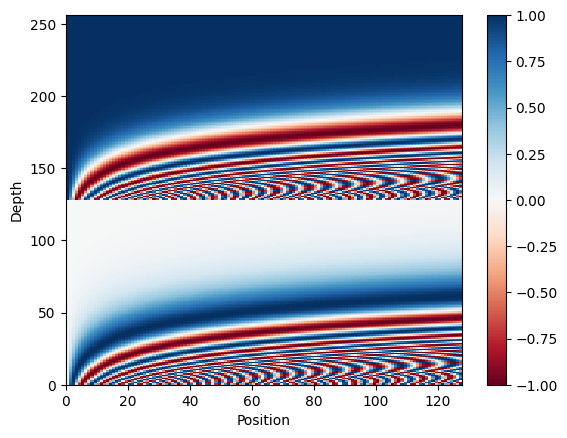

In [ ]:
pos_encoding = positional_encoding(length=MAX_TOKENIZE_LENGTH, depth=EMBEDDING_DEPTH)

# Check the shape.
print(pos_encoding.shape)

# Plot the dimensions.
plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

In [ ]:
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.d_model = d_model
        self.embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=d_model, mask_zero=True)
        self.pos_encoding = positional_encoding(length=MAX_TOKENIZE_LENGTH, depth=d_model)

    def compute_mask(self, *args, **kwargs):
        return self.embedding.compute_mask(*args, **kwargs)

    def call(self, x):
        length = tf.shape(x)[1]
        x = self.embedding(x)
        # This factor sets the relative scale of the embedding and positonal_encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

In [ ]:
embed_cn = PositionalEmbedding(vocab_size=tokenizer_cn.vocab_size, d_model=EMBEDDING_DEPTH)
embed_en = PositionalEmbedding(vocab_size=tokenizer_en.vocab_size, d_model=EMBEDDING_DEPTH)

cn_emb = embed_cn(cn)
en_emb = embed_en(en)

#CN to EN
print(cn_emb.shape) #embedding, positional encoding
print(en_emb.shape)

(64, 128, 256)
(64, 127, 256)


In [ ]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()

In [ ]:
class CrossAttention(BaseAttention):
    def call(self, x, context): #x = query, content = key,value pairs
        attn_output, attn_scores = self.mha(
            query=x,
            key=context,
            value=context,
            return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x

In [ ]:
sample_ca = CrossAttention(num_heads=2, key_dim=EMBEDDING_DEPTH)

# CN to EN
print(cn_emb.shape) #key,pair
print(en_emb.shape) #query
print(sample_ca(en_emb, cn_emb).shape)

(64, 128, 256)
(64, 127, 256)
(64, 127, 256)


In [ ]:
class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

In [ ]:
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=EMBEDDING_DEPTH)

# CN to EN
print(cn_emb.shape)
print(sample_gsa(cn_emb).shape)

(64, 128, 256)
(64, 128, 256)


In [ ]:
class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            use_causal_mask = True)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x


In [ ]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=EMBEDDING_DEPTH)

# CN to EN
print(en_emb.shape)
print(sample_csa(en_emb).shape)

(64, 127, 256)
(64, 127, 256)


In [ ]:
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
          tf.keras.layers.Dense(dff, activation='relu'),
          tf.keras.layers.Dense(d_model),
          tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x)
        return x

In [ ]:
sample_ffn = FeedForward(EMBEDDING_DEPTH,MAX_TOKENIZE_LENGTH)

#CN to EN
print(en_emb.shape)
print(sample_ffn(en_emb).shape)

(64, 127, 256)
(64, 127, 256)


In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()

        self.self_attention = GlobalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x

In [ ]:
sample_encoder_layer = EncoderLayer(d_model=EMBEDDING_DEPTH, num_heads=8, dff=MAX_TOKENIZE_LENGTH)

#CN to EN
print(en_emb.shape)
print(sample_encoder_layer(en_emb).shape)

(64, 127, 256)
(64, 127, 256)


In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
        super().__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(
            vocab_size=vocab_size, d_model=d_model)

        self.enc_layers = [
            EncoderLayer(d_model=d_model,
                         num_heads=num_heads,
                         dff=dff,
                         dropout_rate=dropout_rate)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        # `x` is token-IDs shape: (batch, seq_len)
        x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

        # Add dropout.
        x = self.dropout(x)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x)

        return x  # Shape `(batch_size, seq_len, d_model)`.

In [ ]:
# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=EMBEDDING_DEPTH,
                         num_heads=8,
                         dff=MAX_TOKENIZE_LENGTH,
                         vocab_size=tokenizer_cn.vocab_size)

sample_encoder_output = sample_encoder(cn, training=False)

# Print the shape.
#CN to EN
print(cn.shape)
print(sample_encoder_output.shape)

(64, 128)
(64, 128, 256)


In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
        super(DecoderLayer, self).__init__()

        self.causal_self_attention = CausalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.cross_attention = CrossAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)
        self.ffn = FeedForward(d_model, dff)

    def call(self, x, context):
        x = self.causal_self_attention(x=x)
        x = self.cross_attention(x=x, context=context)

        # Cache the last attention scores for plotting later
        self.last_attn_scores = self.cross_attention.last_attn_scores

        x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
        return x

In [ ]:
sample_decoder_layer = DecoderLayer(d_model=EMBEDDING_DEPTH, num_heads=8, dff=MAX_TOKENIZE_LENGTH)

sample_decoder_layer_output = sample_decoder_layer(
    x=en_emb, context=cn_emb)

#CN to EN
print(en_emb.shape)
print(cn_emb.shape)
print(sample_decoder_layer_output.shape)

(64, 127, 256)
(64, 128, 256)
(64, 127, 256)


In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                                 d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dec_layers = [
            DecoderLayer(d_model=d_model, num_heads=num_heads,
                         dff=dff, dropout_rate=dropout_rate)
            for _ in range(num_layers)]

        self.last_attn_scores = None

    def call(self, x, context):
        # `x` is token-IDs shape (batch, target_seq_len)
         x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

         x = self.dropout(x)

         for i in range(self.num_layers):
             x  = self.dec_layers[i](x, context)

         self.last_attn_scores = self.dec_layers[-1].last_attn_scores

        # The shape of x is (batch_size, target_seq_len, d_model).
         return x

In [ ]:
# Instantiate the decoder.
sample_decoder = Decoder(num_layers=4,
                         d_model=EMBEDDING_DEPTH,
                         num_heads=8,
                         dff=MAX_TOKENIZE_LENGTH,
                         vocab_size=tokenizer_en.vocab_size)

output = sample_decoder(
    x=en,
    context=cn_emb)

# Print the shapes.
#CN to EN
print(en.shape)
print(cn_emb.shape)
print(output.shape)

(64, 127)
(64, 128, 256)
(64, 127, 256)


In [ ]:
sample_decoder.last_attn_scores.shape

TensorShape([64, 8, 127, 128])

In [ ]:
tf.keras.saving.get_custom_objects().clear() #clear previous objects

@tf.keras.saving.register_keras_serializable()
class Transformer(tf.keras.Model):
    def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
        super().__init__()
        self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                               num_heads=num_heads, dff=dff,
                               vocab_size=input_vocab_size,
                               dropout_rate=dropout_rate)

        self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                               num_heads=num_heads, dff=dff,
                               vocab_size=target_vocab_size,
                               dropout_rate=dropout_rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    def call(self, inputs):
        # To use a Keras model with `.fit` you must pass all your inputs in the
        # first argument.
        context, x  = inputs

        context = self.encoder(context)  # (batch_size, context_len, d_model)

        x = self.decoder(x, context)  # (batch_size, target_len, d_model)

        # Final linear layer output.
        logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

        try:
          # Drop the keras mask, so it doesn't scale the
          # b/250038731
            del logits._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return logits


In [ ]:
num_layers = 1
d_model = EMBEDDING_DEPTH
dff = MAX_TOKENIZE_LENGTH
num_heads = 8
dropout_rate = 0.1

In [ ]:
cn_to_en_transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizer_cn.vocab_size,
    target_vocab_size=tokenizer_en.vocab_size,
    dropout_rate=dropout_rate)

In [ ]:
output = cn_to_en_transformer((cn, en))

print(en.shape)
print(cn.shape)
print(output.shape)

(64, 127)
(64, 128)
(64, 127, 28996)


In [ ]:
attn_scores = cn_to_en_transformer.decoder.dec_layers[-1].last_attn_scores
print(attn_scores.shape)

(64, 8, 127, 128)


In [ ]:
@tf.keras.saving.register_keras_serializable()
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super().__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

    def get_config(self):
        return {
            'd_model': int(self.d_model),
            'warmup_steps': int(self.warmup_steps)
        }

learning_rate = CustomSchedule(d_model)

@tf.keras.saving.register_keras_serializable()
class CustomAdam(tf.keras.optimizers.Adam):
    def __init__(self, custom_param, **kwargs):
        super(CustomAdam, self).__init__(**kwargs)
        self.custom_param = custom_param #this is the learning rate (custom schedule)

    def get_config(self):
        config = super(CustomAdam, self).get_config()
        config.update({
            'custom_param': self.custom_param
        })
        return config
optimizer = CustomAdam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

In [ ]:
@tf.keras.saving.register_keras_serializable()
def masked_loss(label, pred):
    mask = label != 0
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
    loss = loss_object(label, pred)

    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask

    loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
    return loss

@tf.keras.saving.register_keras_serializable()
def masked_accuracy(label, pred):
    pred = tf.argmax(pred, axis=2)
    label = tf.cast(label, pred.dtype)
    match = label == pred

    mask = label != 0

    match = match & mask
    match = tf.cast(match, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [ ]:
cn_to_en_transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [ ]:
history = cn_to_en_transformer.fit(cn_to_en_train_set, epochs=2)

Epoch 1/2
197/326 [=================>............] - ETA: 48:21 - loss: 6.0631 - masked_accuracy: 0.1986

KeyboardInterrupt: 

In [ ]:
class Translator(tf.Module):
    def __init__(self, input_tonkenizer,output_tokenizer, transformer):
        self.input_tonkenizer = input_tonkenizer
        self.output_tokenizer = output_tokenizer
        self.transformer = transformer

    def __call__(self, sentence, max_length=MAX_TOKENIZE_LENGTH):
        # For input sentence , hence adding the `[START]` and `[END]` tokens.
        sentence = tf.constant(self.input_tonkenizer.encode(sentence, add_special_tokens=True))[tf.newaxis]
        encoder_input = sentence

        # For output sentence, initialize the output with the `[START]` token.
        start_end = self.output_tokenizer.encode("", add_special_tokens=True)
#         print(start_end)
        start = tf.constant(start_end[0],dtype=tf.int64)[tf.newaxis]
        end = tf.constant(start_end[1],dtype=tf.int64)[tf.newaxis]
#         print(start,end)

        # `tf.TensorArray` is required here (instead of a Python list), so that the
        # dynamic-loop can be traced by `tf.function`.output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
        output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
        output_array = output_array.write(0, start)

#         print(encoder_input.shape)
#         print(output_array.shape)


        for i in tf.range(max_length):
            output = tf.transpose(output_array.stack())
#             print(output)
            predictions = self.transformer([encoder_input, output], training=False)

            # Select the last token from the `seq_len` dimension.
            predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

            predicted_id = tf.argmax(predictions, axis=-1)

            # Concatenate the `predicted_id` to the output which is given to the
            # decoder as its input.
            output_array = output_array.write(i+1, predicted_id[0])

            if predicted_id == end:
              break

        output = tf.transpose(output_array.stack())
        # The output shape is `(1, tokens)`.
#         print(output.shape)
#         print(output)
        text = self.output_tokenizer.decode(output[0], skip_special_tokens=True)  # Shape: `()`.

#         tokens = self.output_tokenizer.convert_ids_to_tokens(output)[0]

        # `tf.function` prevents us from using the attention_weights that were
        # calculated on the last iteration of the loop.
        # So, recalculate them outside the loop.
        self.transformer([encoder_input, output[:,:-1]], training=False)
        attention_weights = self.transformer.decoder.last_attn_scores

        return text, attention_weights
#         return text, tokens, attention_weights
translator = Translator(tokenizer_cn,tokenizer_en, cn_to_en_transformer)

In [ ]:
sentence = "你好，欢迎来到中国"
ground_truth = 'Hello, Welcome to China'

# encoded_text = tf.constant(tokenizer_cn.encode("你好", add_special_tokens=True))
# print(encoded_text)
# print(tokenizer_cn.decode(encoded_text))

translated_text, attention_weights = translator(sentence)

print(translated_text)

the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the


In [ ]:
sentence = "早上好，很高心见到你"
ground_truth = 'Good Morning, nice to meet you'

translated_text, attention_weights = translator(sentence)
print(translated_text)


the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the
